In [27]:
# import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

In [89]:
df = pd.read_csv("../data/speeddating/speeddating_cat.csv")

train, test = train_test_split(df, test_size=0.2, random_state=44)

X_train = train.drop(['match'], axis=1)
y_train = train['match']
X_test = test.drop(['match'], axis=1)
y_test = test['match']

#### Define Hyperparameters to test

In [81]:
# knn
n_neighbour = np.arange(9, 21, 2) 
weights = ['uniform', 'distance']

# svc
svc_kernel = ['linear', 'poly', 'rbf', 'sigmoid']

# trees
tree_max_depth = [6, 9, 12, 15]
tree_min_split = [3, 6, 9, 12]
forest_n_estimators = np.arange(15, 30)
forest_max_depth = np.arange(15, 30)
forest_min_split = np.arange(15, 30)

### scores

In [82]:
# Scores: MSE, RMSE, R2
def print_performance(y_test, y_pred):
    # Mean Squared Error
    print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
    
    print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    
    # R2 is between 0 and 100 percent
    # 0 indicates that the model explains none of the variability of the response data around its mean.
    # 100 indicates that the model explains all the variability of the response data around its mean.
    print("R2: ", metrics.r2_score(y_test,y_pred) * 100)

# DEPRECATED: especially for linear regression
def print_scores(model, x_train, y_train):
    r_sq = model.score(x_train, y_train)
    b0 = model.intercept_
    b1 = model.coef_
    print("r_sq, coefficient of determination: ")
    print(r_sq)
    print("b0, intercept: ")
    print(b0)
    print("b1, slope: ")
    print(b1)
    
    print("y_pred = model.intercept_ + model.coef_ * x")

# Metrics: various fancy metrics
def print_metrics(y_test, y_pred):
    results = pd.DataFrame(list(zip(y_test, y_pred)), 
                   columns =['Wage_test', 'Wage_prediction']) 
    
    accuracy = results["Wage_test"] - results["Wage_prediction"]
    accuracy = np.square(accuracy)
    accuracy = np.sqrt(accuracy)
    
    print("# compare test and prediction")
    print(results)
    
    print("# bad predictions (over 100 difference)")
    print(results[(results["Wage_test"] - results["Wage_prediction"]) > 5])
    
    print("# span of data")
    span = results["Wage_test"].max() - results["Wage_test"].min()
    print(span)
    
    print("# median accuracy")
    median = np.median(accuracy) 
    print(median)
    
    print("# percent deviation")
    percent = median / span * 100
    percent_str = "{:.4f}".format(percent)
    percent_str = percent_str + " %"
    print(percent_str)
    
def show_roc(y_test, y_pred):
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

#### KNN

In [83]:
def knn_grid(X_train, y_train, X_test):
    print('KNN')
    grid = GridSearchCV(estimator=KNeighborsClassifier(),
                 param_grid={'n_neighbors': n_neighbour,
                            'weights': weights})
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    return grid.predict(X_test)

def knn(X_train, y_train, X_test):
    # cat & num
    knn = KNeighborsClassifier(n_neighbors = 19, weights= 'distance')
    knn.fit(X_train, y_train)
    return knn.predict(X_test)
    
# y_test_knn = knn_grid(X_train, y_train, X_test)
y_test_knn = knn(X_train, y_train, X_test)


MSE:  0.15414012738853503
RMSE:  0.3926068356365373
R2:  -8.627978935195358
# compare test and prediction
      Wage_test  Wage_prediction
0             1                0
1             0                0
2             1                0
3             0                0
4             0                0
...         ...              ...
3920          1                0
3921          1                1
3922          0                0
3923          1                0
3924          0                0

[3925 rows x 2 columns]
# bad predictions (over 100 difference)
Empty DataFrame
Columns: [Wage_test, Wage_prediction]
Index: []
# span of data
1
# median accuracy
0.0
# percent deviation
0.0000 %
[[3238   15]
 [ 590   82]]


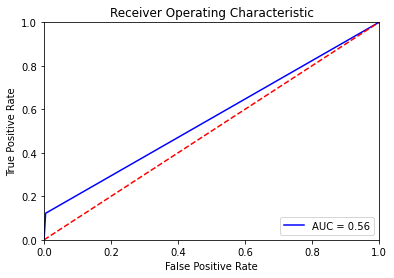

In [84]:
print_performance(y_test, y_test_knn)
print_metrics(y_test, y_test_knn)
print(metrics.confusion_matrix(y_test, y_test_knn))
show_roc(y_test, y_test_knn)

#### SVC

In [85]:
def svc_grid(X_train, y_train, X_test):
    print('\nSVC')
    grid = GridSearchCV(estimator=SVC(random_state = 42),
                 param_grid={'kernel': svc_kernel})
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    y_pred = grid.predict(X_test)
    return y_pred

def svc(X_train, y_train, X_test):
    # cat & num 
    svc = SVC(random_state = 42)
    svc.fit(X_train, y_train)
    return svc.predict(X_test)

# y_test_svc = svc_grid(X_train, y_train, X_test)
y_test_svc = svc(X_train, y_train, X_test)


MSE:  0.0
RMSE:  0.0
R2:  100.0
# compare test and prediction
      Wage_test  Wage_prediction
0             1                1
1             0                0
2             1                1
3             0                0
4             0                0
...         ...              ...
3920          1                1
3921          1                1
3922          0                0
3923          1                1
3924          0                0

[3925 rows x 2 columns]
# bad predictions (over 100 difference)
Empty DataFrame
Columns: [Wage_test, Wage_prediction]
Index: []
# span of data
1
# median accuracy
0.0
# percent deviation
0.0000 %
[[3253    0]
 [   0  672]]


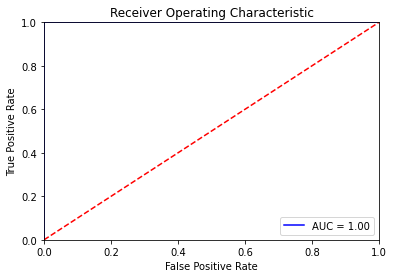

In [86]:
print_performance(y_test, y_test_svc)
print_metrics(y_test, y_test_svc)
print(metrics.confusion_matrix(y_test, y_test_svc))
show_roc(y_test, y_test_svc)

#### Random Forest

In [87]:
def randomForest_grid(X_train, y_train, X_test):
    print('\nRandom Forest')
    grid = GridSearchCV(estimator=RandomForestClassifier(),
                 param_grid={'n_estimators': forest_n_estimators,
                             'max_depth': forest_max_depth,
                             'min_samples_leaf': forest_min_split})
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    y_pred = grid.predict(X_test)
    return y_pred

def randomForest(X_train, y_train, X_test):
    print('\nRandom Forest')
    # num
    # rf = RandomForestClassifier(max_depth = 20, min_samples_leaf = 16, n_estimators = 27)
    # cat
    rf = RandomForestClassifier(max_depth = 28, min_samples_leaf = 15, n_estimators = 18)
    rf.fit(X_train, y_train)
    return rf.predict(X_test)

# y_test_rf = randomForest_grid(X_train, y_train, X_test)
y_test_rf = randomForest(X_train, y_train, X_test)



Random Forest


MSE:  0.08840764331210191
RMSE:  0.29733422828880957
R2:  37.69601869336729
# compare test and prediction
      Wage_test  Wage_prediction
0             1                0
1             0                0
2             1                0
3             0                0
4             0                0
...         ...              ...
3920          1                0
3921          1                1
3922          0                0
3923          1                0
3924          0                0

[3925 rows x 2 columns]
# bad predictions (over 100 difference)
Empty DataFrame
Columns: [Wage_test, Wage_prediction]
Index: []
# span of data
1
# median accuracy
0.0
# percent deviation
0.0000 %
[[3253    0]
 [   0  672]]


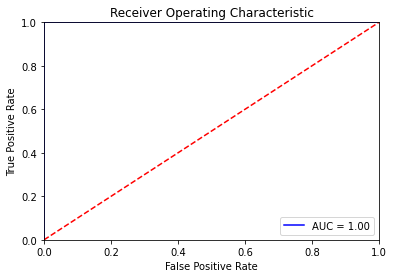

In [88]:
print_performance(y_test, y_test_rf)
print_metrics(y_test, y_test_rf)
print(metrics.confusion_matrix(y_test, y_test_svc))
show_roc(y_test, y_test_svc)